In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define variables
sigma_y = 41.1e6 # Yield strength (Pa)
river_vel = 3 # Maximum river flow speed (m/s)
L = 0.6 # Width of blade (m)
r_drum = 0.2 # Radius of drum (m)

# Define constants
rho = 1000 # Density of fresh water (kg/m^3)
RPM = 20 # Rotations per minute
CD = 1.28 # Drag coefficient

# Calculate relative velocity (at the root of the blade):
angular_vel = RPM * 2 * np.pi / 60 # Angular velocity (rad/s)
blade_vel = angular_vel * r_drum # Blade velocity (m/s)
rel_vel = river_vel - blade_vel # Relative velocity (m/s)

print("Angular velocity: ", angular_vel)
print("Blade velocity: ", blade_vel)
print("Relative velocity: ", rel_vel)

h = ((rho * (rel_vel**2) * CD * L**2)/(4 * sigma_y))**0.5
print("Minimum blade thickness: ", h*1000, "mm")

Angular velocity:  2.0943951023931953
Blade velocity:  0.41887902047863906
Relative velocity:  2.5811209795213608
Minimum blade thickness:  4.321292754155765 mm


In [3]:
def minimum_blade_thickness(sigma_y, river_vel, L, r_drum, rho=1000, RPM=40, CD=1.28):
    # Calculate relative velocity (at the root of the blade):
    angular_vel = RPM * 2 * np.pi / 60 # Angular velocity (rad/s)
    blade_vel = angular_vel * r_drum # Blade velocity (m/s)
    rel_vel = river_vel - blade_vel # Relative velocity (m/s)

    # Calculate minimum blade thickness
    h = ((rho * (rel_vel**2)*CD*L**2)/(4 * sigma_y))**0.5*1000

    return h

# Test the function
sigma_y = 21.9e6 # Yield strength (Pa)
river_vel = 3.5 # Maximum river flow speed (m/s)
L = 0.6 # Width of blade (m)
r_drum = 0.2 # Radius of drum (m)
h = minimum_blade_thickness(sigma_y, river_vel, L, r_drum)
print("Minimum blade thickness: ", h, "mm")

Minimum blade thickness:  6.105928382867101 mm


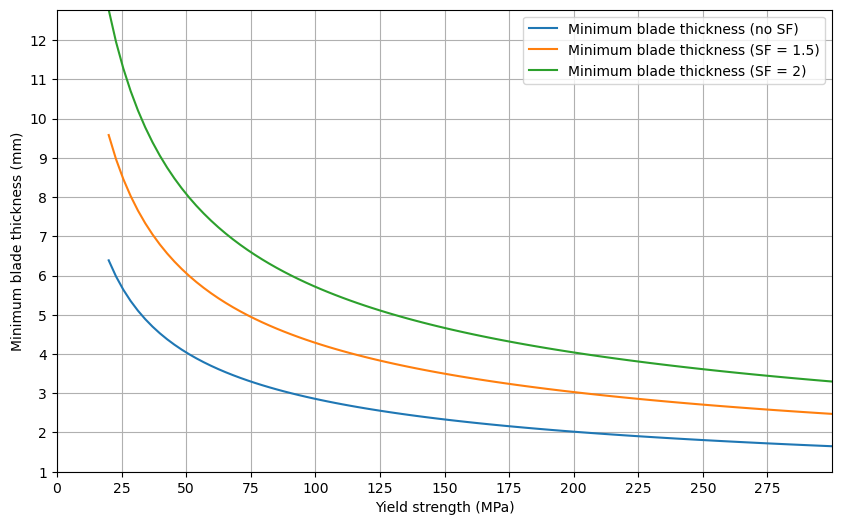

In [4]:
import matplotlib.pyplot as plt

# Define the range of yield strengths
sigams = np.linspace(20e6, 300e6, 100)

# Calculate h for each yield strength
h_values = minimum_blade_thickness(sigams, river_vel, L, r_drum)

# Define x and y ticks
x_ticks = np.arange(0, max(sigams/1e6), 25)
y_ticks = np.arange(0, 2* max(h_values), 1)

# Plot h vs velocity
plt.figure(figsize=(10, 6))
plt.plot(sigams/1e6, h_values, label='Minimum blade thickness (no SF)')
plt.plot(sigams/1e6, h_values*1.5, label='Minimum blade thickness (SF = 1.5)')
plt.plot(sigams/1e6, h_values*2, label='Minimum blade thickness (SF = 2)')
plt.xlabel('Yield strength (MPa)')
plt.ylabel('Minimum blade thickness (mm)')
plt.legend()
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(True)
plt.xlim(0, max(sigams/1e6))
plt.ylim(1, 2* max(h_values))
plt.show()